In [1]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# 데이터 로딩
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# 케라스에서 처리할 수 있는 형태로 변환 샘플개수 x 가로 x 세로 x 차원
train_images = train_images.reshape((60000, 28,28,1))
train_images = train_images.astype('float32') /255

test_images = test_images.reshape((10000, 28,28,1))
test_images = test_images.astype('float32') /255

In [3]:
# 원 핫 인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[:2])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [4]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

# 모델생성
model = Sequential()
#convolution layer, 필터개수 32, 필터크기 3x3,
#입력데이터 28x28x1 (흑백이미지1, 컬러이미지3)
model.add((Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))))
# 맥스풀링 필터사이즈 2x2
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))

# fully connected layer로 변환(완전 연결층)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# 출력층 10개의 숫자로 분류
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [5]:
# 모델 학습
hist = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1363 - accuracy: 0.9576
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0444 - accuracy: 0.9861
Epoch 3/5
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0311 - accuracy: 0.9904
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0239 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0189 - accuracy: 0.9942


In [6]:
# 검증용 데이터로 모델의 성능평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0254 - accuracy: 0.9935


(0.025404538959264755, 0.9934999942779541)

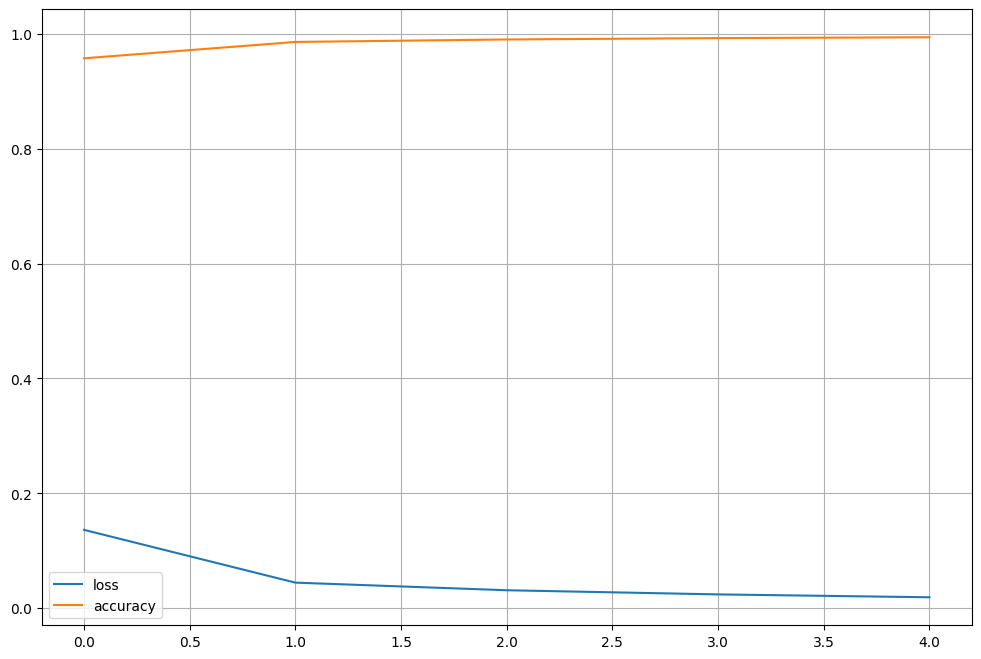

c:\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
# 모델의 학습과정 표시
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 손실률
plt.plot(hist.history['accuracy']) # 정확도
plt.legend(['loss', 'accuracy'])
plt.grid()
plt.show()

model.save('c:/work/data/mnist/mnist.h5')
